In [1]:
# Libraries for Extract, Treat and Load
import numpy as np, pandas as pd

# Libraries for Data Visualization
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

# Libraries for Data Sciente
import statsmodels.api as sm

📈 Objetivo do Projeto
Você deve investigar os fatores que influenciam o total de vendas (vendas) e responder à seguinte pergunta:

“Quais variáveis estão mais associadas com o desempenho de vendas mensal das lojas?”

✅ Tarefas Esperadas
Análise Exploratória dos Dados (EDA):

- Histograma ou boxplot das variáveis numéricas.

- Gráfico de linha da variação das vendas ao longo dos meses.

- Comparações entre regiões (ex: vendas médias por região com seaborn.barplot).

- Correlação entre as variáveis (heatmap).

🔍 Visualizações com plotly express:

- Gráfico de dispersão entre clientes e vendas, com cores por região (use px.scatter).

- Linha de tendência com trendline='ols' para visualização de regressão.

✔ Modelo de Regressão Linear com statsmodels:

- Faça a regressão de vendas como variável dependente.

- Inclua como variáveis independentes: clientes, descontos, campanha_marketing, preco_medio_produto, indice_satisfacao, regiao (usar dummies)

Interprete os coeficientes e valores-p.

Analise os resíduos.

Conclusão:

- Quais variáveis são estatisticamente significantes?

- Como a empresa pode usar essas informações para aumentar suas vendas?

📌 Exemplo de Gráficos Esperados

- histograma: distribuição das vendas

- boxplot: comparação das vendas por região

- scatterplot: vendas vs. clientes com cores por região

- lineplot: tendência de vendas ao longo dos meses

-  heatmap: correlação entre variáveis numéricas

In [2]:
# Importando dados
FactSales = pd.read_parquet('Sales.parquet')

# Lendo o cabeçalho da base de dados
FactSales.head()

,IdLoja,MesAnoVenda,Regiao,Clientes,DescontoPercent,CampanhaMarketing,PrecoMedio,IndiceSatisfacao,Vendas
0,1,2024-01,Sudeste,1475,5.0,1,113.71,8.23,160.85
1,1,2024-02,Sudeste,689,12.0,0,192.27,7.07,108.34
2,1,2024-03,Sudeste,1457,23.0,0,168.23,6.77,175.96
3,1,2024-04,Sudeste,1186,14.0,0,106.73,9.28,98.76
4,1,2024-05,Sudeste,1457,30.0,0,96.89,7.48,91.43


In [3]:
# Verificando se há valores nulos

print(FactSales.isnull().sum(), FactSales.isna().sum(), sep='\n-----------------------\n')

IdLoja               0
MesAnoVenda          0
Regiao               0
Clientes             0
DescontoPercent      0
CampanhaMarketing    0
PrecoMedio           0
IndiceSatisfacao     0
Vendas               0
dtype: int64
-----------------------
IdLoja               0
MesAnoVenda          0
Regiao               0
Clientes             0
DescontoPercent      0
CampanhaMarketing    0
PrecoMedio           0
IndiceSatisfacao     0
Vendas               0
dtype: int64


In [4]:
# Resumo informativo da tabela

FactSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IdLoja             720 non-null    int64  
 1   MesAnoVenda        720 non-null    object 
 2   Regiao             720 non-null    object 
 3   Clientes           720 non-null    int32  
 4   DescontoPercent    720 non-null    float64
 5   CampanhaMarketing  720 non-null    int32  
 6   PrecoMedio         720 non-null    float64
 7   IndiceSatisfacao   720 non-null    float64
 8   Vendas             720 non-null    float64
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 45.1+ KB


In [5]:
from cycler import cycler

cores = plt.get_cmap('Pastel1').colors

FactSales.columns

Index(['IdLoja', 'MesAnoVenda', 'Regiao', 'Clientes', 'DescontoPercent',
       'CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao', 'Vendas'],
      dtype='object')

In [6]:
colors = px.colors.qualitative.Pastel

fig = px.box(FactSales[['Clientes', 'DescontoPercent','CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao', 'Vendas']], 
       color_discrete_sequence=colors
       )

fig.show()

<Axes: >

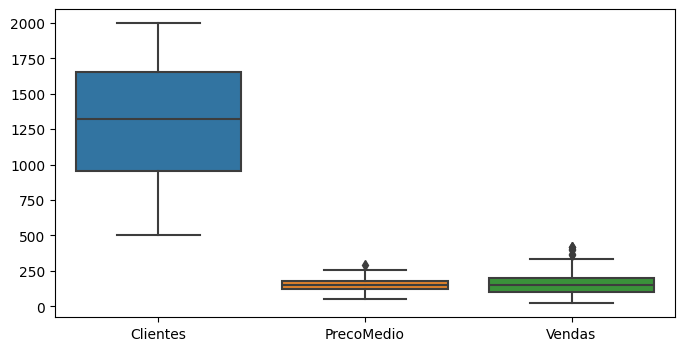

In [7]:
plt.figure(figsize=(8, 4))

sns.boxplot(FactSales[['Clientes', 'PrecoMedio', 'Vendas']])

<Axes: >

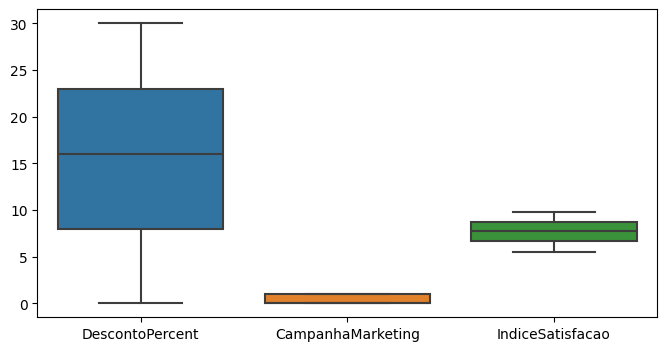

In [8]:
plt.figure(figsize=(8, 4))

sns.boxplot(FactSales[['DescontoPercent','CampanhaMarketing', 'IndiceSatisfacao']])

array([[<Axes: title={'center': 'Clientes'}>,
        <Axes: title={'center': 'DescontoPercent'}>],
       [<Axes: title={'center': 'CampanhaMarketing'}>,
        <Axes: title={'center': 'PrecoMedio'}>],
       [<Axes: title={'center': 'IndiceSatisfacao'}>,
        <Axes: title={'center': 'Vendas'}>]], dtype=object)

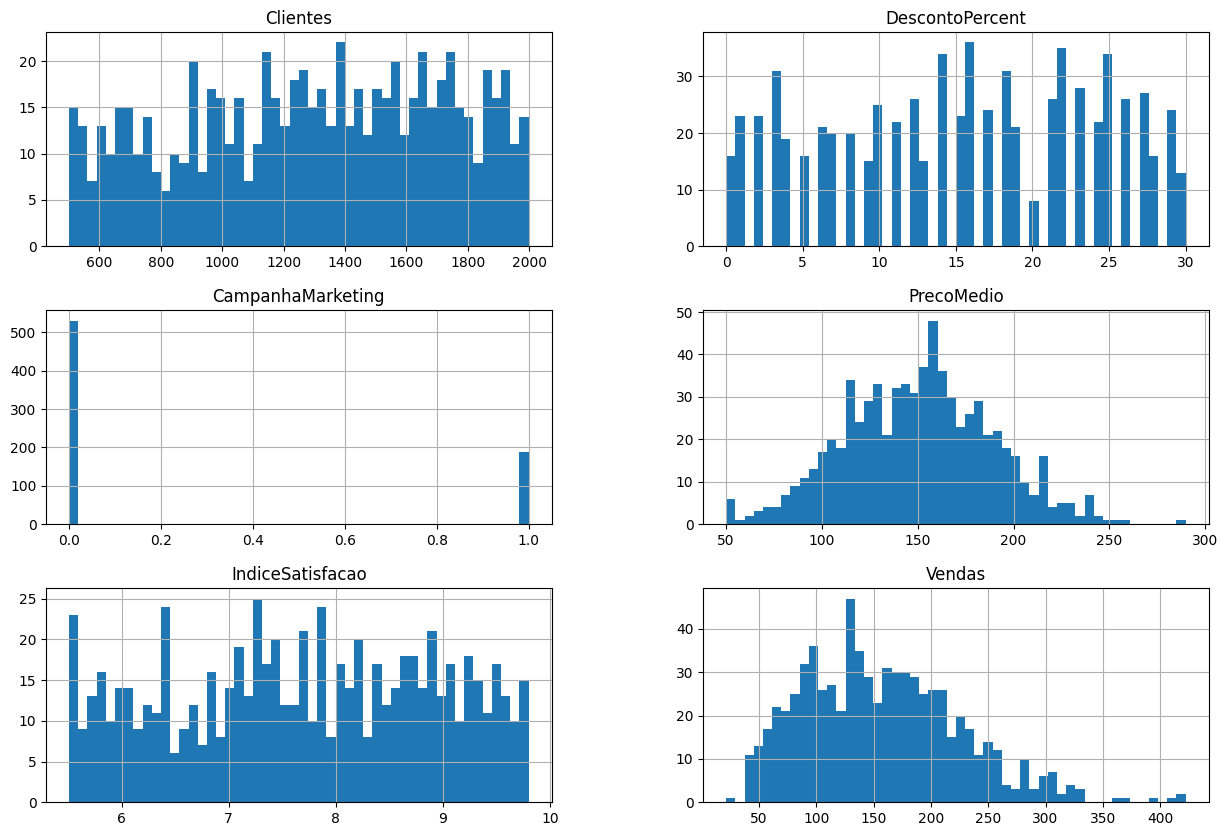

In [9]:
FactSales[['Clientes', 'DescontoPercent','CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao', 'Vendas']].hist(figsize=(15,10), bins=50)

<Axes: >

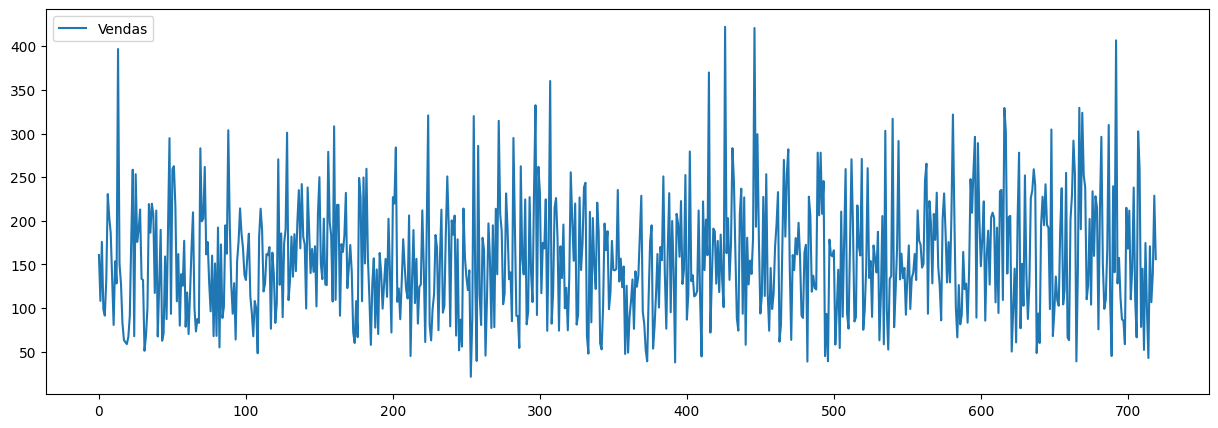

In [10]:
FactSales[['MesAnoVenda', 'Vendas']].plot(kind='line', figsize=(15,5))

c:\Users\adrya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adrya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



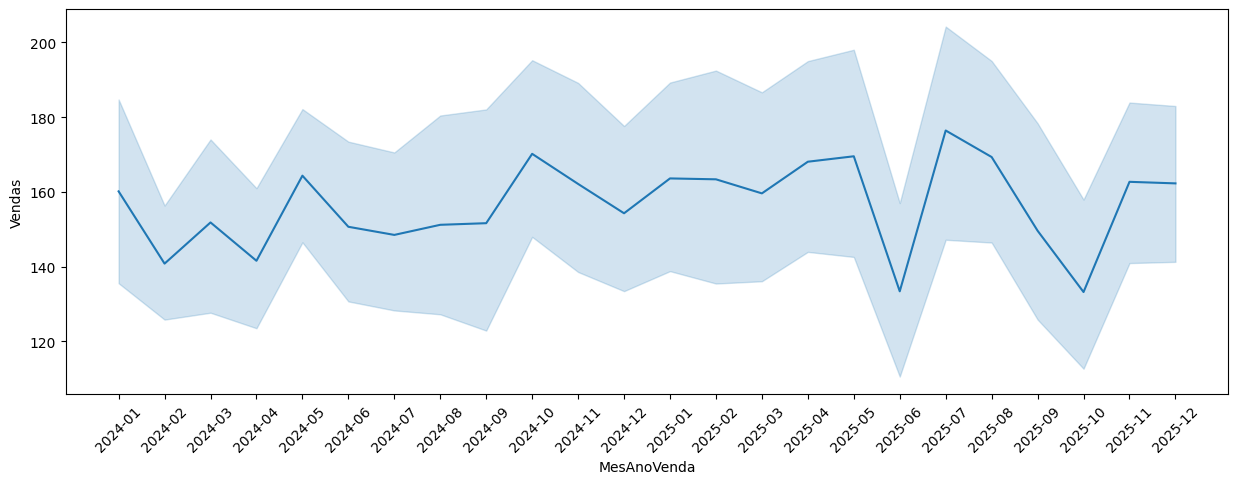

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(FactSales[['MesAnoVenda', 'Vendas']], x='MesAnoVenda', y='Vendas')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

<Axes: xlabel='Regiao', ylabel='Vendas'>

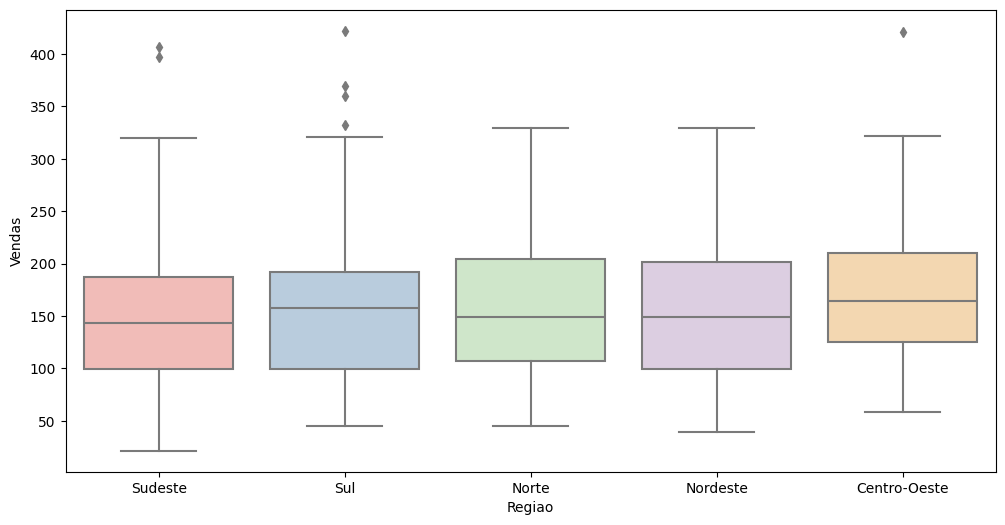

In [12]:
plt.rc('axes', prop_cycle=cycler('color', cores))

plt.figure(figsize=(12,6))
sns.boxplot(data=FactSales[['Vendas', 'Regiao']], x='Regiao', y='Vendas')

In [13]:
colors = px.colors.qualitative.Pastel
fig = px.box(FactSales[['Vendas', 'Regiao']], x='Regiao', y='Vendas', color_discrete_sequence=colors)

fig.update_yaxes(tickprefix="R$ ", showgrid=True)


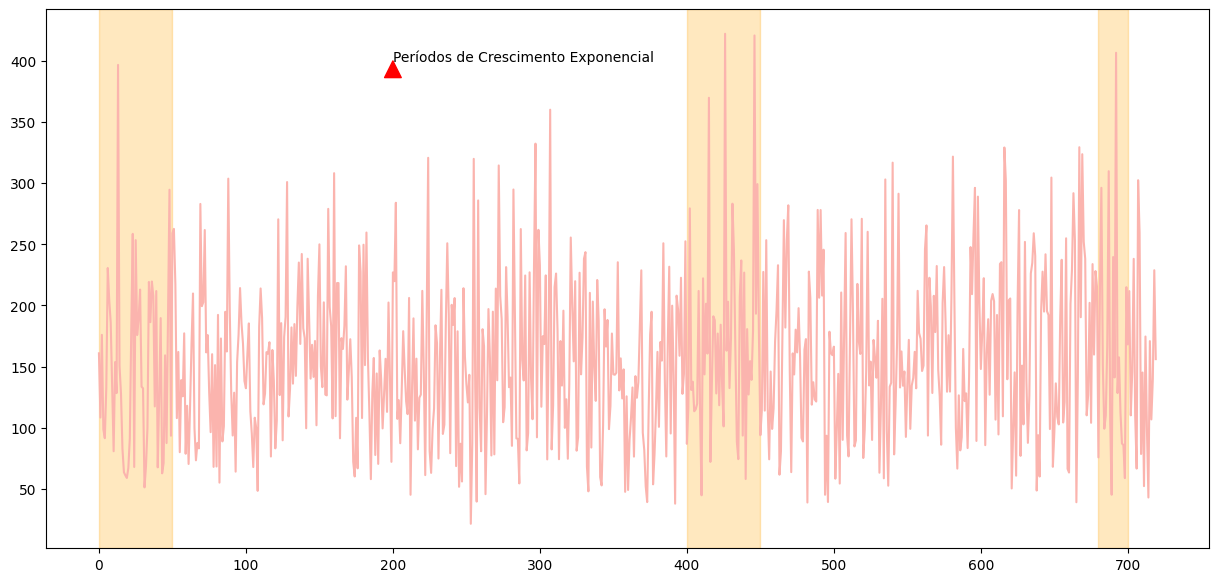

In [14]:
plt.figure(figsize=(15,7))
plt.plot(FactSales['Vendas'])
plt.axvspan(0, 50, alpha=0.25, color='orange')
plt.axvspan(400, 450, alpha=0.25, color='orange')
plt.axvspan(680, 700, alpha=0.25, color='orange')
plt.annotate('Períodos de Crescimento Exponencial', xy=(200,400), arrowprops={'color': 'red'})
plt.show()

In [15]:
colors = px.colors.sequential.Cividis

fig = px.line(FactSales['Vendas'], color_discrete_sequence=colors)


fig.add_shape(
    type="rect",
    x0=400, x1=600,  # intervalo no eixo x
    y0=0, y1=1,  # cobre toda a altura do gráfico
    xref='x', yref='paper',  # 'paper' faz com que vá de 0 a 1 no eixo y
    fillcolor="LightSalmon",
    opacity=0.3,
    layer="below",
    line_width=3,
)

fig.show()

In [16]:
# 'lowess', 'rolling', 'ewm', 'expanding', 'ols'

colors = px.colors.qualitative.Safe

fig = px.scatter(
            FactSales[['Clientes', 'Vendas', 'Regiao']],
            x='Clientes',
            y='Vendas',
            color='Regiao',
            color_discrete_sequence=colors,
            trendline='ols',
            animation_frame='Regiao'
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5000

fig.show()

In [17]:
# 'lowess', 'rolling', 'ewm', 'expanding', 'ols'

colors = px.colors.qualitative.Safe

fig = px.scatter(
            FactSales[['Clientes', 'Vendas', 'Regiao']],
            x='Clientes',
            y='Vendas',
            color='Regiao',
            color_discrete_sequence=colors,
            trendline='lowess',
            animation_frame='Regiao'
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5000

fig.show()

In [18]:
BaseAuxiliar = FactSales[['Vendas', 'Regiao', 'Clientes', 'DescontoPercent','CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao']]
BaseAuxiliar = pd.get_dummies(BaseAuxiliar, dtype=int, drop_first=True)

BaseAuxiliar.corr()

,Vendas,Clientes,DescontoPercent,CampanhaMarketing,PrecoMedio,IndiceSatisfacao,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
Vendas,1.000000,0.729536,-0.213872,0.104656,0.592785,-0.011278,-0.007910,0.023442,-0.056867,-0.007873
Clientes,0.729536,1.000000,0.030508,0.017694,-0.000937,0.028239,0.005422,0.043178,-0.058158,-0.036234
DescontoPercent,-0.213872,0.030508,1.000000,-0.008279,-0.016978,0.058259,0.001219,0.031233,0.000774,-0.051810
CampanhaMarketing,0.104656,0.017694,-0.008279,1.000000,-0.044454,0.012872,-0.004235,-0.015673,-0.017132,0.014180
PrecoMedio,0.592785,-0.000937,-0.016978,-0.044454,1.000000,-0.009760,-0.034988,0.016337,-0.035681,0.016673
IndiceSatisfacao,-0.011278,0.028239,0.058259,0.012872,-0.009760,1.000000,0.003191,-0.030917,-0.001733,0.023177
Regiao_Nordeste,-0.007910,0.005422,0.001219,-0.004235,-0.034988,0.003191,1.000000,-0.246718,-0.269680,-0.246718
Regiao_Norte,0.023442,0.043178,0.031233,-0.015673,0.016337,-0.030917,-0.246718,1.000000,-0.332674,-0.304348
Regiao_Sudeste,-0.056867,-0.058158,0.000774,-0.017132,-0.035681,-0.001733,-0.269680,-0.332674,1.000000,-0.332674
Regiao_Sul,-0.007873,-0.036234,-0.051810,0.014180,0.016673,0.023177,-0.246718,-0.304348,-0.332674,1.000000


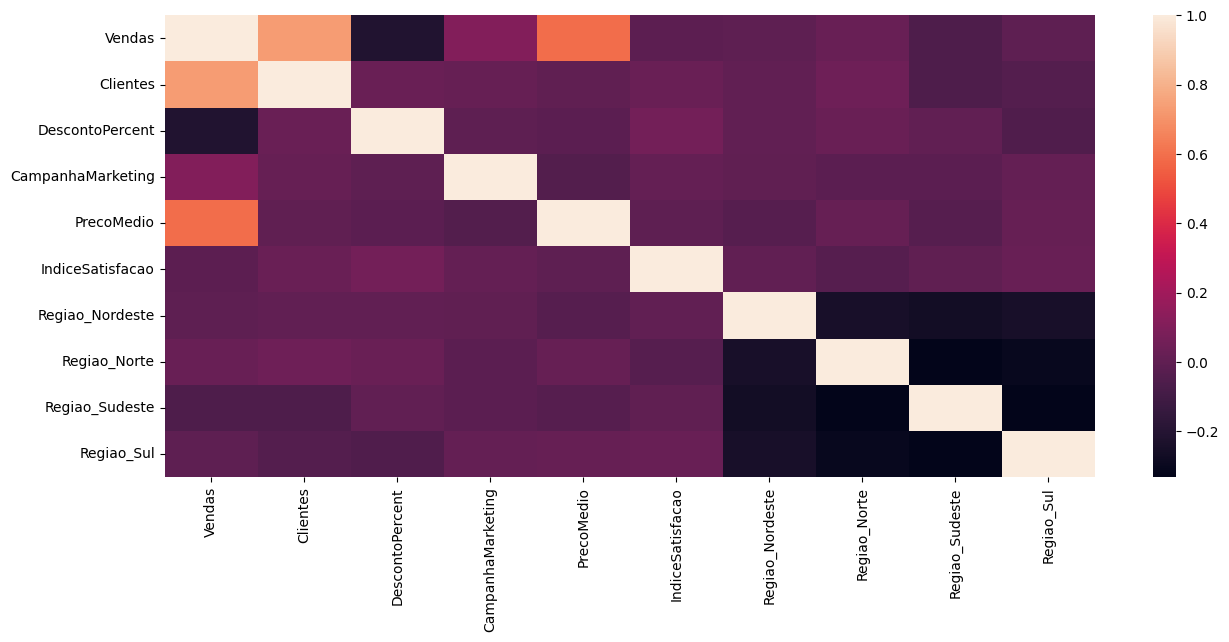

In [19]:
plt.figure(figsize=(15, 6))

sns.heatmap(BaseAuxiliar.corr())

plt.show()

In [20]:
y = BaseAuxiliar['Vendas']

X = sm.add_constant(BaseAuxiliar.drop(columns='Vendas'))

modelo1 = sm.OLS(y, X)

resultado1 = modelo1.fit()

resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1485.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:23:08   Log-Likelihood:                -2987.6
No. Observations:                 720   AIC:                             5995.
Df Residuals:                     710   BIC:                             6041.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -129.2326      5.149    -25.097      0.000    -139.342    -119.123
Clientes              0.1197      0.001     86.865      0.000       0.117       0.122
DescontoPercent      -1.7681      0.067    -26.489      0.000      -1.899      -1.637
CampanhaMarketing    18.1179      1.311     13.818      0.000      15.544      20.692
PrecoMedio            1.0485      0.015     70.418      0.000       1.019       1.078
IndiceSatisfacao     -0.8317      0.475     -1.752      0.080      -1.764       0.100
Regiao_Nordeste       2.8235      2.311      1.222      0.222      -1.713       7.360
Regiao_Norte          0.1320      2.180      0.061      0.952      -4.148       4.412
Regiao_Sudeste        2.3932      2.147      1.115      0.265      -1.823       6.609
Regiao_Sul            0.8317      2.186      0.381      0.704      -3.459       5.122
==============================================================================
Omnibus:                      137.075   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.421
Skew:                           0.813   Prob(JB):                    1.51e-126
Kurtosis:                       7.083   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

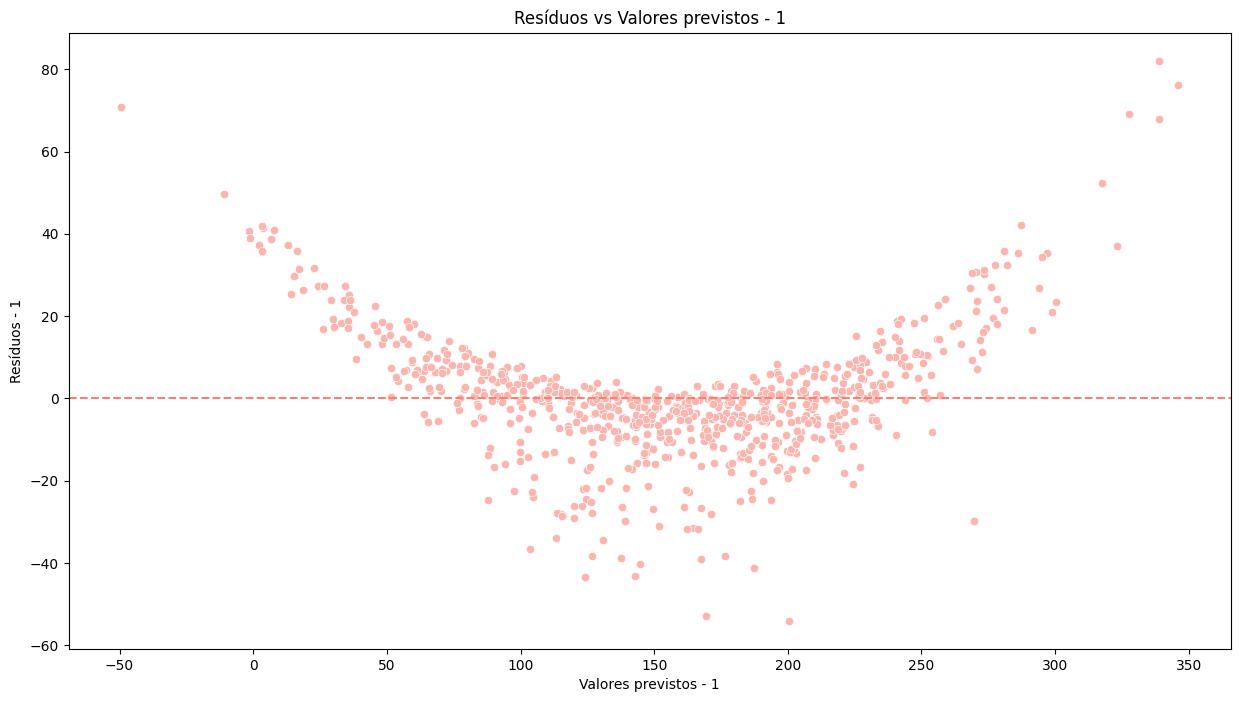

In [21]:
residuos1 = resultado1.resid

previstos1 = resultado1.fittedvalues

plt.figure(figsize=(15,8))
sns.scatterplot(x=previstos1, y=residuos1)
plt.axhline(y=0, color='salmon', linestyle='--')
plt.xlabel('Valores previstos - 1')
plt.ylabel('Resíduos - 1')
plt.title('Resíduos vs Valores previstos - 1')

plt.show()

In [22]:
y = BaseAuxiliar['Vendas']

X = sm.add_constant(BaseAuxiliar.drop(columns=['Vendas', 'IndiceSatisfacao', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']))

modelo2 = sm.OLS(y, X)

resultado2 = modelo2.fit()

resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3331.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:23:08   Log-Likelihood:                -2991.0
No. Observations:                 720   AIC:                             5992.
Df Residuals:                     715   BIC:                             6015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -133.6334      3.117    -42.870      0.000    -139.753    -127.513
Clientes              0.1195      0.001     87.026      0.000       0.117       0.122
DescontoPercent      -1.7764      0.067    -26.670      0.000      -1.907      -1.646
CampanhaMarketing    18.0425      1.312     13.756      0.000      15.467      20.618
PrecoMedio            1.0469      0.015     70.400      0.000       1.018       1.076
==============================================================================
Omnibus:                      137.584   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.329
Skew:                           0.822   Prob(JB):                    8.66e-125
Kurtosis:                       7.042   Cond. No.                     7.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

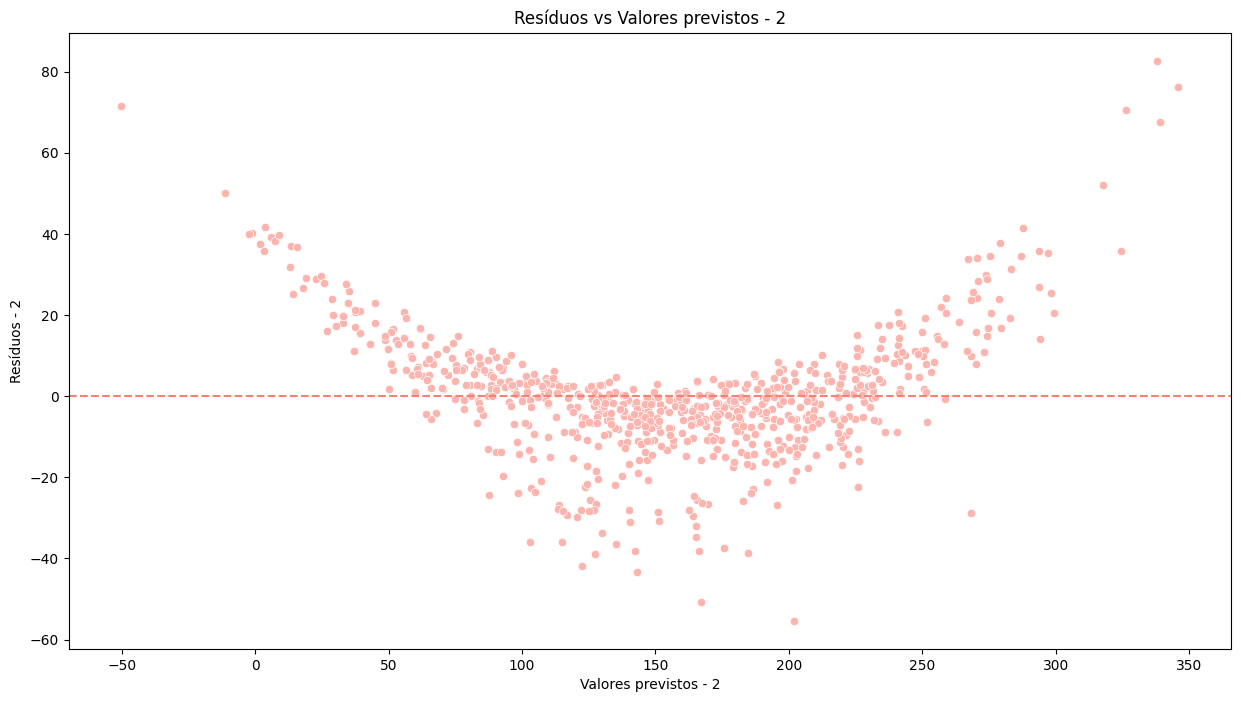

In [23]:
residuos2 = resultado2.resid

previstos2 = resultado2.fittedvalues

plt.figure(figsize=(15,8))
sns.scatterplot(x=previstos2, y=residuos2)
plt.axhline(y=0, color='salmon', linestyle='--')
plt.xlabel('Valores previstos - 2')
plt.ylabel('Resíduos - 2')
plt.title('Resíduos vs Valores previstos - 2')
plt.show()

In [24]:
fig = px.scatter(x=previstos2, 
                 y=residuos2,
                 labels={'x':'Previstos - 2', 'y':'Residuos - 2'},
                 title='Resíduos vs Valores previstos - 2'
                 )

fig.add_hline(y=0, 
              line={'dash': 'dash',
               }
            )

fig.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variavel'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif)

,variavel,VIF
0,const,29.244862
1,Clientes,1.001255
2,DescontoPercent,1.001312
3,CampanhaMarketing,1.002385
4,PrecoMedio,1.002282


Conclusão:

- Quais variáveis são estatisticamente significantes?

Resposta: As variáveis mais significantes são CampanhaMarketing com coeficiente 18.0425, DescontoPercent com coeficiente -1.7764, PrecoMedio com coeficiente 1.0469 e com o ajuste realizado nos modelos acima, o modelo 2 se configura como mais confiável, que apesar do mesmo R² de 0.949, desconsidera as variáveis irrelavantes.

- Como a empresa pode usar essas informações para aumentar suas vendas?

Resposta: A empresa poderá direcionar seus esforços em mais campanhas de marketing, uma vez que tem um potencial maior na atração de clientes e efetivação de vendas, ainda, é possível dedicar tempo na elaboração de políticas melhores de desconto e até cross-selling, tendo em vista que os descontos oferecidos podem estar tempo um impacto negativo nas vendas.